# Metabolization

In pharmacokinetics and enzymology, the rate at which reactions occur is crucial. Different mathematical models are used to describe these rates, with some of the most common being the Mass-Action model, the Michaelis-Menten model, and the Hill equation. Here's a brief summary of each:

**1. Mass-Action Model**: This model is one of the simplest and is based on the principle that the rate of a reaction is directly proportional to the concentration of the reacting substances. For a reaction A + B → C, the rate would be expressed as Rate = k[A][B], where k is the rate constant, and [A] and [B] are the concentrations of A and B.

**2. Michaelis-Menten Model**: This model is used to describe enzyme-catalyzed reactions, particularly when enzyme concentrations are much lower than substrate concentrations. The rate of reaction (v) is given by the equation v = Vmax[S]/(Km + [S]), where Vmax is the maximum rate, [S] is the substrate concentration, and Km is the Michaelis constant (the substrate concentration at which the reaction rate is half of Vmax). 

**3. Hill Equation**: This model is often used when there is cooperativity or interaction between multiple binding sites on a molecule (like a protein or enzyme). The equation is given by v = Vmax[S]^n/(Kd + [S]^n), where n is the Hill coefficient representing the degree of cooperativity.

For both the Michaelis-Menten model and Hill equation, values of Vmax, Km, and Kd are usually determined experimentally.


## Inhibition and activition
Inhibition and activation also play crucial roles in metabolic models:

**Inhibition**: This occurs when a molecule binds to an enzyme and decreases its activity. Inhibitors can be competitive (bind to the active site and compete with the substrate), non-competitive (bind to a separate site and change the enzyme's shape), or uncompetitive (bind to the enzyme-substrate complex). Each type of inhibition changes the parameters (Vmax, Km) in distinctive ways.

**Activation**: This is when a molecule binds to an enzyme and increases its activity. This can lead to an increase in the maximum reaction rate (Vmax) or a decrease in the Km value, indicating an increased affinity of the enzyme for its substrate.

In summary, these models and concepts help scientists understand and predict the behavior of enzymes and other biochemical reactions, which is crucial in fields like drug design and metabolic engineering.

## Rate equations

### Mass-Action Model
This model is one of the simplest and is based on the principle that the rate of a reaction is directly proportional to the concentration of the reacting substances. For a reaction A + B → C, the rate would be expressed as

\begin{equation}
v = k \cdot A \cdot B
\end{equation}

where k is the rate constant, and A and B are the concentrations of A and B.

In case of reaction A → B, the rate would be expressed as

\begin{equation}
v = k \cdot A
\end{equation}

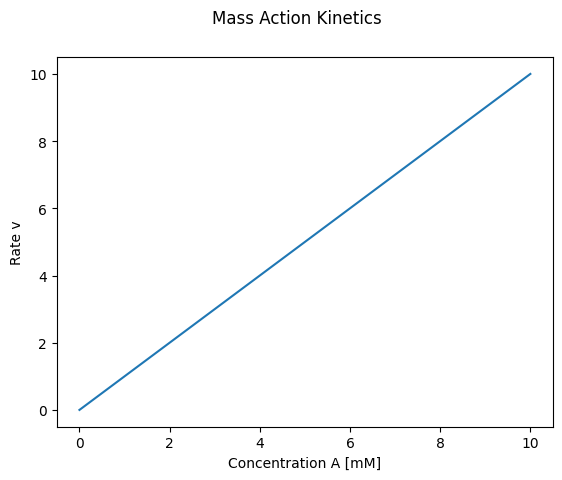

In [1]:
import numpy as np
from matplotlib import pyplot as plt

k = 1.0
A = np.linspace(0, 10, num=100)  # [mM]
v = k * A

f, ax = plt.subplots(nrows=1, ncols=1)
f.suptitle("Mass Action Kinetics")
ax.plot(A, v)
ax.set_xlabel("Concentration A [mM]")
ax.set_ylabel("Rate v")
plt.show()

**Exercise**: Plot the dependency of the rate v on the rate constant k. I.e. perform a parameter scan and show the rate curves for different k values.

### Michaelis-Menten Model
This model is used to describe enzyme-catalyzed reactions, particularly when enzyme concentrations are much lower than substrate concentrations. The rate of reaction (v) is given by the equation 

\begin{equation}
v = \frac{Vmax \cdot A}{Km + A}
\end{equation}

, where Vmax is the maximum rate, A is the substrate concentration, and Km is the Michaelis constant (the substrate concentration at which the reaction rate is half of Vmax).

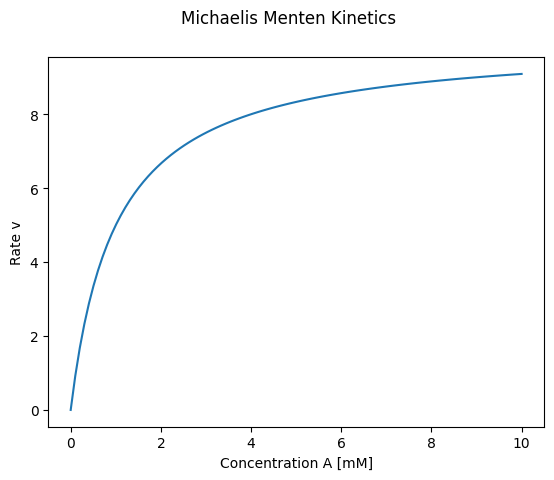

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Km = 1.0  # [mM]
Vmax = 10
A = np.linspace(0, 10, num=100)  # [mM]
v = Vmax * A/(Km + A)

f, ax = plt.subplots(nrows=1, ncols=1)
f.suptitle("Michaelis Menten Kinetics")
ax.plot(A, v)
ax.set_xlabel("Concentration A [mM]")
ax.set_ylabel("Rate v")
plt.show()

**Exercise**: Plot the dependency of the rate v on the parameters Km and Vmax. I.e. perform a parameter scan and show the curves for different Km and Vmax values.

### Hill Equation
This model is often used when there is cooperativity or interaction between multiple binding sites on a molecule (like a protein or enzyme). The equation is given by 

\begin{equation}
v = \frac{Vmax \cdot A^n}{Kd^n + A^n}
\end{equation}

, where n is the Hill coefficient representing the degree of cooperativity.

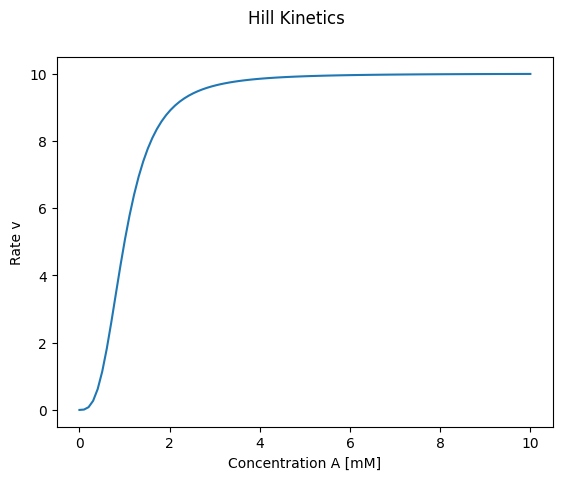

In [3]:
import numpy as np
from matplotlib import pyplot as plt

Km = 1.0  # [mM]
Vmax = 10
n = 3
A = np.linspace(0, 10, num=100)  # [mM]
v = Vmax * A**n/(Km**n + A**n)

f, ax = plt.subplots(nrows=1, ncols=1)
f.suptitle("Hill Kinetics")
ax.plot(A, v)
ax.set_xlabel("Concentration A [mM]")
ax.set_ylabel("Rate v")
plt.show()

Exercise: Plot the dependency of the rate v on the parameters Km and n. I.e. perform a parameter scan and show the curves for different Km and n values.

### Inhibition 
A simple competitive inhibition term for a rate equation is

\begin{equation}
(\frac{1}{Ki + I})
\end{equation}

with Ki being the inhibition constant and I being the concentration of the inhibitor.

# Pathway model of metabolism

Our next step are simple metabolic networks. The basic ingredients for model construction are the stoichiometry, the rate equations, and the parameters.

We start with a simple linear chain,

\begin{equation}
X \longrightarrow S_1 \longrightarrow S_2 \longrightarrow S_3  \longrightarrow Y 
\end{equation}

and irreversible Michaelis-Menten equations

\begin{equation}
v_i = \frac{V_\mathrm{max} S_i}{K_M + S_i}
\end{equation}

The external metabolites $X$ and $Y$ are like (constant) parameters. The concentration of $X$ is included into the (constant) influx value. 

The python function might look like this:

In [4]:
def LinearChain(S,t):
    """ Implements the simple linear chain with irreversible MM kinetics. """

    # define metabolites
    S1 = S[0]
    S2 = S[1]
    S3 = S[2]

    # define parameters
    influx = 1.0
    Km1 = 1.0; Vm1 = 2.0
    Km2 = 1.0; Vm2 = 3.0
    Km3 = 1.0; Vm3 = 4.0

    # define rate functions
    v0 = influx # constant
    v1 = Vm1*S1/(Km1+S1)
    v2 = Vm2*S2/(Km2+S2)
    v3 = Vm3*S3/(Km3+S3)

    # define stoichiometry
    dS1dt = +v0 - v1
    dS2dt = +v1 - v2
    dS3dt = +v2 - v3

    return [dS1dt, dS2dt, dS3dt]

To integrate the pathway, we use `odeint`:

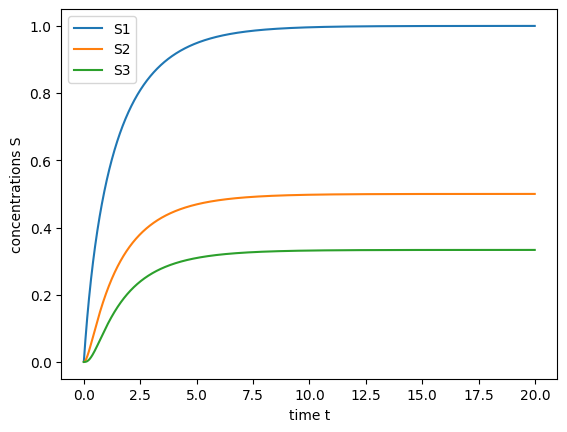

In [5]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

T = np.arange(0,20,0.01)
S0 = [0, 0, 0]

S = odeint(LinearChain,S0,T)
plt.plot(T,S)
plt.legend(['S1','S2','S3'])
plt.xlabel('time t')
plt.ylabel('concentrations S')
plt.show()

**Exercise:** Implement the system using mass action kinetics instead of Michaelis-Menten Kinetics

**Exercise:** Add an inhibition term to v1 via S3 (inhibition via pathway product)